In [84]:
import ROOT
import numpy as np
ROOT.gROOT.SetBatch(True)
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.insert(0, "/Users/joosep/Documents/heplot/")
sys.path.insert(0, "/Users/joosep/Documents/btv/SuperTagger/python/")

In [3]:
import rootpy

In [4]:
import supertagger_train

In [115]:
d1 = supertagger_train.ROOTData(filename="data/ttjets_b_testing.root", treename="tree_b")
d2 = supertagger_train.ROOTData(filename="data/ttjets_c_testing.root", treename="tree_c")

In [116]:
d1_cls = supertagger_train.ROOTData(filename="SuperTagger/ttjets_b_testing.root", treename="tree")
d2_cls = supertagger_train.ROOTData(filename="SuperTagger/ttjets_c_testing.root", treename="tree")

In [117]:
d1.load()
d2.load()
d1_cls.load()
d2_cls.load()

In [118]:
d1.tree.AddFriend(d1_cls.tree)

<ROOT.TFriendElement object ("tree") at 0x7f922e0e8b90>

In [119]:
d2.tree.AddFriend(d2_cls.tree)

<ROOT.TFriendElement object ("tree") at 0x7f922e0f3710>

In [135]:
def roc(h1, h2):
    h1 = h1.Clone()
    h2 = h2.Clone()
    h1.Scale(1.0 / h1.Integral())
    h2.Scale(1.0 / h2.Integral())
    c1 = h1.GetCumulative()
    c2 = h2.GetCumulative()
    nb = c1.GetNbinsX()
    ret = np.zeros((nb, 2))
    err = np.zeros((nb, 2))
    for i in range(nb):
        ret[i,0] = c1.GetBinContent(i+1) 
        ret[i,1] = c2.GetBinContent(i+1)
        err[i,0] = 0.0*c1.GetBinError(i+1) 
        err[i,1] = 0.0*c2.GetBinError(i+1)
    return ret, err

In [136]:
h1 = d1.hist("cls1", (1000,-1,1), "1").Clone("h1")
h2 = d2.hist("cls1", (1000,-1,1), "1").Clone("h2")
rc1, ec1 = roc(h1, h2)

821830
624637


In [137]:
h1 = d1.hist("cls2", (1000,-1,1), "1").Clone("h1")
h2 = d2.hist("cls2", (1000,-1,1), "1").Clone("h2")
rc2, ec2 = roc(h1, h2)

821830
624637


In [138]:
h1 = d1.hist("bd_csv1", (1000,-10,10), "1").Clone("h1")
h2 = d2.hist("bd_csv1", (1000,-10,10), "1").Clone("h2")
rc_csv1, ec_csv1 = roc(h1, h2)

821830
624637


In [139]:
h1 = d1.hist("bd_csv2", (1000,-10,10), "1").Clone("h1")
h2 = d2.hist("bd_csv2", (1000,-10,10), "1").Clone("h2")
rc_csv2, ec_csv2 = roc(h1, h2)

821830
624637


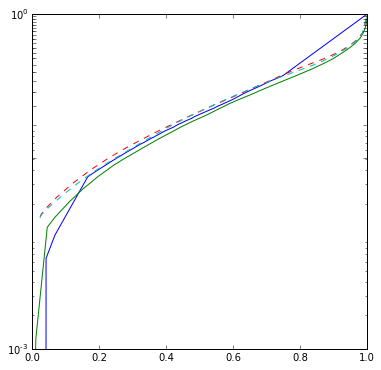

In [143]:
plt.figure(figsize=(6,6))
#plt.grid(dashes=[])
# plt.errorbar(rc1[:, 1], rc1[:, 0], xerr=ec1[:, 0], yerr=ec1[:, 1])
# plt.errorbar(rc2[:, 1], rc2[:, 0], xerr=ec2[:, 0], yerr=ec2[:, 1])
# plt.errorbar(rc_csv1[:, 1], rc_csv1[:, 0], xerr=ec_csv1[:, 0], yerr=ec_csv1[:, 1])
# plt.errorbar(rc_csv2[:, 1], rc_csv2[:, 0], xerr=ec_csv2[:, 0], yerr=ec_csv2[:, 1])

plt.plot(rc1[:, 1], rc1[:, 0])
plt.plot(rc2[:, 1], rc2[:, 0])
plt.plot(rc_csv1[:, 1], rc_csv1[:, 0], ls="--")
plt.plot(rc_csv2[:, 1], rc_csv2[:, 0], ls="--")


plt.xlim(0,1)
plt.ylim(0,1)
plt.yscale("log")
plt.ylim(0.001,0.2)
plt.yticks(np.linspace(0.001,1.0,21));